### EJERCICIO TÉCNICO MÓDULO 3  MAI GARCÍA

### 1. DESCARGA E IMPORTACIÓN DE LIBRERIAS

In [2]:
#Procesamiento de datos

import pandas as pd
import numpy as np 
import random

#Gestión de nulos

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

#Visualización 
import matplotlib.pyplot as plt 
import seaborn as sns

#Estadística 
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import shapiro, kstest, poisson, levene, bartlett, mannwhitneyu

#Configuración

pd.set_option ('display.max_columns', None)

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

### 2. UNIÓN DE DATAFRAMES

In [3]:
# LECTURA DE LOS CSVs

df_activity = pd.read_csv ('Customer Flight Activity.csv')

df_loyalty = pd.read_csv ('Customer Loyalty History.csv')




In [4]:
# INSPECCIONAMOS LAS TABLAS 

df_activity.columns



Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [5]:
df_loyalty.columns


Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [6]:
# UNIMOS LAS DOS TABLAS


In [7]:
# Usamos un merge para unir las tablas

df_merge = df_activity.merge(df_loyalty, on = 'Loyalty Number', how = 'outer')



In [8]:
df_merge.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


### 3. ANALISIS EDA 

In [9]:
# EXPLORACIÓN DE DATOS

df_merge.head()  # Muestra las primeras 5 filas del DataFrame (por defecto, pero puedes especificar un número).


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


In [10]:
df_merge.tail()  # Muestra las últimas 5 filas del DataFrame (por defecto, pero puedes especificar un número).

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
405619,999986,2018,7,15,0,15,1995,199.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
405620,999986,2018,9,0,0,0,0,0.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
405621,999986,2018,10,6,0,6,708,70.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
405622,999986,2018,11,11,4,15,2040,204.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
405623,999986,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN


In [11]:
df_merge.sample()  # Devuelve una fila aleatoria del DataFrame (puedes especificar cuántas filas con `n`).


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
304627,773012,2018,8,10,9,19,2223,222.0,0,0,Canada,Nova Scotia,Halifax,B3C 2M8,Male,Bachelor,59837.0,Married,Nova,7406.88,Standard,2012,11,NaN,NaN


In [12]:
df_merge.columns  # Devuelve los nombres de las columnas


Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

In [13]:
df_merge.shape # Devuelve una tupla con el número de filas y columnas del DataFrame (filas, columnas).


(405624, 25)

In [14]:
df_merge.dtypes # Ver tipos de datos de cada columna

Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year              float64
Cancellation Month             float64
dtype: object

In [15]:
df_merge.info()  # Muestra información del DataFrame como el número de filas, columnas y tipos de datos.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 12  City                         405624 non-null  object 
 13 

In [16]:
# VAMOS A ANALIZAR AHORA LOS TIPOS DE OBJETO

In [17]:
print (df_merge['Postal Code'])


0         T9G 1W3
1         T9G 1W3
2         T9G 1W3
3         T9G 1W3
4         T9G 1W3
           ...   
405619    K1F 2R2
405620    K1F 2R2
405621    K1F 2R2
405622    K1F 2R2
405623    K1F 2R2
Name: Postal Code, Length: 405624, dtype: object


In [18]:
print (df_merge['Salary'])

0         92552.0
1         92552.0
2         92552.0
3         92552.0
4         92552.0
           ...   
405619    46594.0
405620    46594.0
405621    46594.0
405622    46594.0
405623    46594.0
Name: Salary, Length: 405624, dtype: float64


In [19]:
print (df_merge['CLV'])

0         7919.20
1         7919.20
2         7919.20
3         7919.20
4         7919.20
           ...   
405619    8257.01
405620    8257.01
405621    8257.01
405622    8257.01
405623    8257.01
Name: CLV, Length: 405624, dtype: float64


In [20]:
# Vamos a cambiar la columna de distance de int a float
df_merge['Distance'] = df_merge ['Distance'].astype(float)
# Vamos a cambiar la columna de Point acumulated de float a int
df_merge['Points Accumulated'] = df_merge ['Points Accumulated'].astype(int)

# La columna de postal code no es necesario cambiarla a int porque en algunos paises contienen letras.



In [21]:
df_merge.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.00,326961.00,550834.00,772194.00,999986.00
Year,405624.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
Month,405624.0,6.500000,3.452057,1.00,3.75,6.50,9.25,12.00
Flights Booked,405624.0,4.115052,5.225518,0.00,0.00,1.00,8.00,21.00
Flights with Companions,405624.0,1.031805,2.076869,0.00,0.00,0.00,1.00,11.00
Total Flights,405624.0,5.146858,6.521227,0.00,0.00,1.00,10.00,32.00
Distance,405624.0,1208.880059,1433.155320,0.00,0.00,488.00,2336.00,6293.00
Points Accumulated,405624.0,123.667002,146.579083,0.00,0.00,50.00,239.00,676.00
Points Redeemed,405624.0,30.696872,125.486049,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.00,0.00,0.00,0.00,71.00


### CONCLUSIONES E INSIGHTS

    # De estas tablas podemos sacar las siguientes conclusiones.
    # Nos fijaremos en una de las columnas para explicar cada detalle:
        # Count: Se refiere al numero de datos no nulos en la columna 'distance'.
        # Mean: Se refiere a la media de kilometros
        # Std: La desviación estandar, que mide la dispersión entre las diferentes distancias.
        # Min: La distancia mínima
        # Max: La distancia máxima
        # Los percentiles:
           # 25% - representa el valor que esta en el puesto 25, y los valores por debajo.
           # 50% - representa la MEDIANA, y se refiere al valor en el puesto 50, diviediendo el conjunto de datos en dos mitades iguales
           # 75% - representa el valor en el puesto 75 y los que están entre el 50 y el 75.


In [22]:
# DESCRIPCIÓN DE COLUMNAS NUMÉRICAS Y CATEGÓRICAS


In [23]:
df_merge.select_dtypes(include=[object])


,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,Enrollment Type
0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,Standard
1,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,Standard
2,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,Standard
3,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,Standard
4,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,Standard
...,...,...,...,...,...,...,...,...,...
405619,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,Married,Nova,2018 Promotion
405620,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,Married,Nova,2018 Promotion
405621,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,Married,Nova,2018 Promotion
405622,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,Married,Nova,2018 Promotion


In [24]:

df_merge.select_dtypes(include=[int])

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Enrollment Year,Enrollment Month
0,100018,2017,1,3,0,3,152,0,0,2016,8
1,100018,2017,2,2,2,4,132,0,0,2016,8
2,100018,2018,10,6,4,10,311,385,31,2016,8
3,100018,2017,4,4,0,4,92,0,0,2016,8
4,100018,2017,5,0,0,0,0,0,0,2016,8
...,...,...,...,...,...,...,...,...,...,...,...
405619,999986,2018,7,15,0,15,199,0,0,2018,2
405620,999986,2018,9,0,0,0,0,0,0,2018,2
405621,999986,2018,10,6,0,6,70,0,0,2018,2
405622,999986,2018,11,11,4,15,204,0,0,2018,2


In [25]:
df_merge.select_dtypes(include=[float])


,Distance,Salary,CLV,Cancellation Year,Cancellation Month
0,1521.0,92552.0,7919.20,NaN,NaN
1,1320.0,92552.0,7919.20,NaN,NaN
2,3110.0,92552.0,7919.20,NaN,NaN
3,924.0,92552.0,7919.20,NaN,NaN
4,0.0,92552.0,7919.20,NaN,NaN
...,...,...,...,...,...
405619,1995.0,46594.0,8257.01,NaN,NaN
405620,0.0,46594.0,8257.01,NaN,NaN
405621,708.0,46594.0,8257.01,NaN,NaN
405622,2040.0,46594.0,8257.01,NaN,NaN


In [26]:
# Puesto que no hay columnas repetidas y todas están nombradas correctamente, no vamos a borrar columnas repetidas, ni renombrarlas


In [27]:
# VISUALIZACIÓN DE LOS VALORES NULOS

In [28]:
df_merge.isnull().sum()


Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              355560
Cancellation Month             355560
dtype: int64

In [29]:
# Hay valores nulos en las siguientes columnas:

    # Salary
    # Cancellation Year
    # Cancellation Month



nulos = df_merge.isnull().sum()/df_merge.shape[0]*100

# % nulos ordenados de mayor a menor
nulos.sort_values(ascending=False)


Cancellation Month             87.657535
Cancellation Year              87.657535
Salary                         25.312112
Postal Code                     0.000000
Enrollment Month                0.000000
Enrollment Year                 0.000000
Enrollment Type                 0.000000
CLV                             0.000000
Loyalty Card                    0.000000
Marital Status                  0.000000
Education                       0.000000
Gender                          0.000000
Loyalty Number                  0.000000
Year                            0.000000
Province                        0.000000
Country                         0.000000
Dollar Cost Points Redeemed     0.000000
Points Redeemed                 0.000000
Points Accumulated              0.000000
Distance                        0.000000
Total Flights                   0.000000
Flights with Companions         0.000000
Flights Booked                  0.000000
Month                           0.000000
City            

In [30]:
# VISUALIZACIÓN DE DUPLICADOS 

In [31]:
# Aquí vamos a ver la suma de todos los duplicados

df_merge.duplicated().sum()


1864

In [32]:
# Aquí vamos a especificar los detalles de las filas duplicadas

df_merge[df_merge.duplicated().sort_values()]



,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
985,101902,2017,1,0,0,0,0.0,0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
988,101902,2017,2,0,0,0,0.0,0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
990,101902,2017,3,0,0,0,0.0,0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
998,101902,2017,7,0,0,0,0.0,0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
1009,101902,2017,12,0,0,0,0.0,0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402315,992168,2017,2,0,0,0,0.0,0,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,High School or Below,66386.0,Married,Nova,5746.33,Standard,2012,9,NaN,NaN
402324,992168,2017,6,0,0,0,0.0,0,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,High School or Below,66386.0,Married,Nova,5746.33,Standard,2012,9,NaN,NaN
402331,992168,2017,9,0,0,0,0.0,0,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,High School or Below,66386.0,Married,Nova,5746.33,Standard,2012,9,NaN,NaN
402347,992168,2018,6,0,0,0,0.0,0,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,High School or Below,66386.0,Married,Nova,5746.33,Standard,2012,9,NaN,NaN


In [33]:
# VISUALIZAR DISTRIBUCIÓN

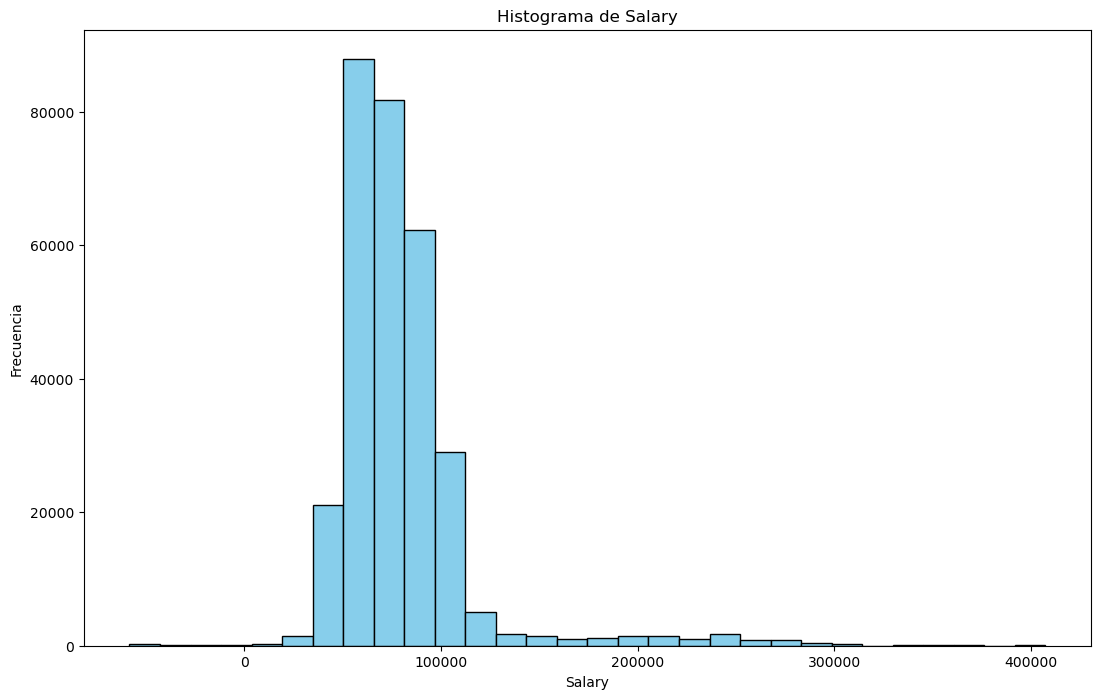

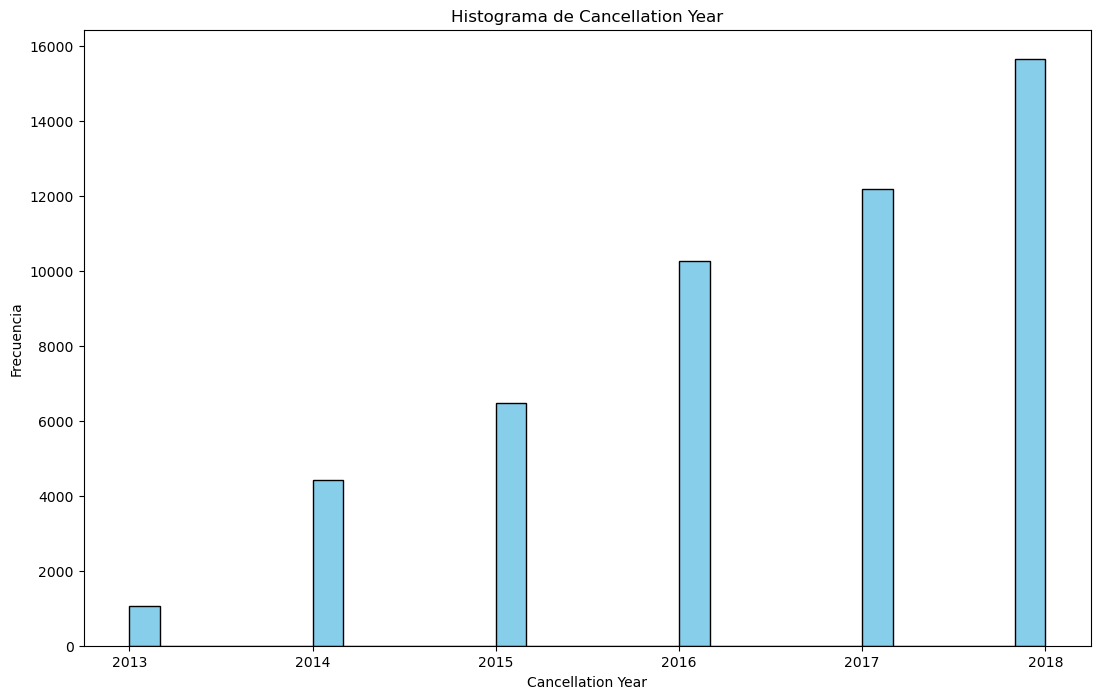

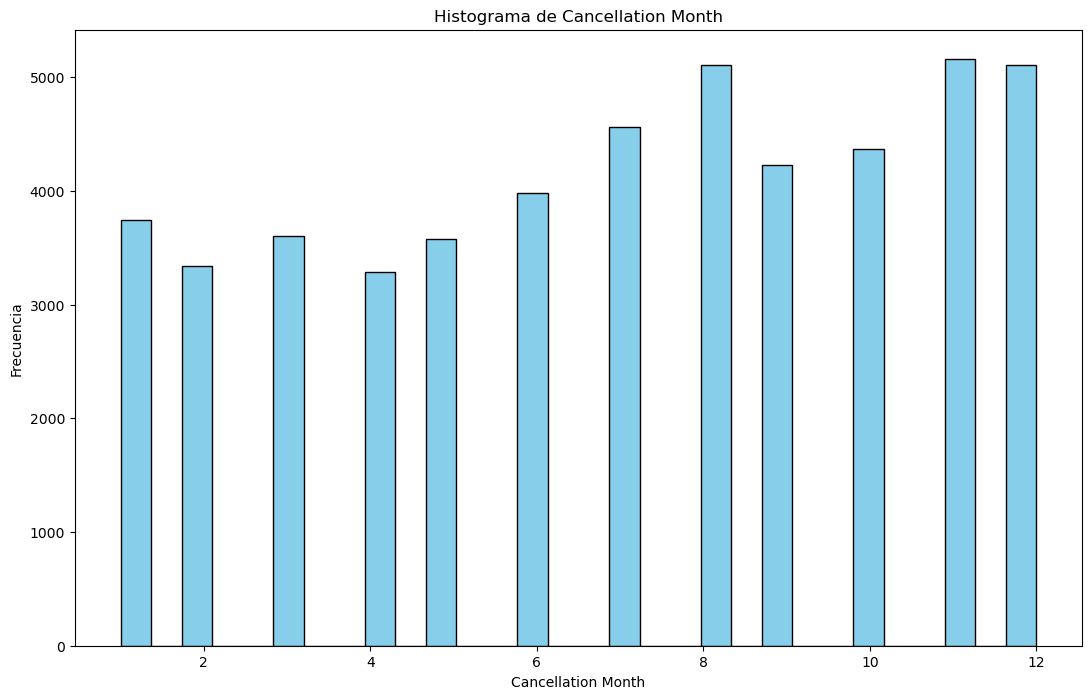

In [34]:
# Vamos a utilizar un histograma para estudiar la distribución de los valores de las columnas que contienen nulos.

# Fase 1: Filtramos las columnas numéricas que tienen valores nulos

columnas_number_con_nulos = df_merge[df_merge.columns[df_merge.isnull().any()]].select_dtypes(include = "number").columns

# Fase 2: Hacemos gráficas de histogramas:

for col in list(columnas_number_con_nulos):
    plt.figure(figsize=(13, 8))
    plt.hist(df_merge[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()




### CONCLUSIONES E INSIGHTS


    # Podemos ver que ninguna tiene una distribución normal, ninguna contiene una distribución gaussiana.

    # En el histograma de salario los valores se concentran entre 30k y 120k, por lo que vemos que ese es el rango donde se encuentra el salario de la mayoría de los clientes. 
    # Como vemos está sesgada hacia la izquierda por lo que los salarios son más bajos que en una distribucion normal.
    # También sugiere que los valores extremos pueden afectar a la media por lo que en este caso es mejor utilizar la mediana.


    # El histograma de cancellation year tiene una distribución creciente ascendente por lo que podemos deducir que los clientes han ido dándose de baja con mayor frecuencia en los últimos años.
    # Esto quiere decir que deberíamos sugerir a la empresa investigar porqué los clientes se dan de baja con más frecuencia en los últimos años
    # En esta columna los valores nulos, los cuales son un porcentaje muy alto (87%), sugieren que son clientes que todavía están activos.
    # Esto podría plantear la posibilidad de idear algunas politicas de fidelización para conservarlos y así solucionar esa disrtribucion creciente del histograma de cancellation year.


    # El histograma de cancellation month tiene una distribución más uniforme destacando agosto, noviembre y diciembre como los meses donde se producen más cancelaciones, pero la diferencia no es excesiva. 
    # Es posible que los picos en las cancelaciones coincidan con el final de alguna promoción o la temporada alta y por tanto el aumento de los precios.


In [35]:
# VISUALIZACIÓN DE VALORES ÚNICOS


In [36]:
df_merge['City'].unique()


array(['Edmonton', 'Toronto', 'Dawson Creek', 'Vancouver', 'Regina',
       'Montreal', 'Sudbury', 'Winnipeg', 'Quebec City', 'Peace River',
       "St. John's", 'Tremblant', 'Ottawa', 'Trenton', 'Thunder Bay',
       'West Vancouver', 'Fredericton', 'London', 'Halifax', 'Moncton',
       'Banff', 'Kingston', 'Whistler', 'Charlottetown', 'Hull',
       'Victoria', 'Calgary', 'Kelowna', 'Whitehorse'], dtype=object)

In [37]:
df_merge['City'].nunique() #número de valores únicos en esa columna

29

In [38]:
df_merge['City'].value_counts()  # Devuelve el conteo de cada valor único en una columna.



City
Toronto           81096
Vancouver         62520
Montreal          49920
Winnipeg          15984
Whistler          14040
Halifax           12576
Ottawa            12312
Edmonton          11808
Quebec City       11760
Trenton           11760
Dawson Creek      10776
Fredericton       10344
Regina             9936
Kingston           9720
Tremblant          9600
Victoria           9504
Hull               8688
West Vancouver     7872
St. John's         6312
Thunder Bay        6264
Sudbury            5520
Moncton            5088
Calgary            4584
Banff              4296
London             4224
Peace River        2712
Whitehorse         2688
Kelowna            2136
Charlottetown      1584
Name: count, dtype: int64

In [39]:
# Ahora vamos a ver los valores únicos de cada columna del dataframe. Para ello vamos a usar un bucle:


for col in df_merge:
    print(f'Estos son los valores únicos de la columna {col.upper()}')
    print(df_merge[col].unique())
    print('\n ------------------------------ \n')



Estos son los valores únicos de la columna LOYALTY NUMBER
[100018 100102 100140 ... 999940 999982 999986]

 ------------------------------ 

Estos son los valores únicos de la columna YEAR
[2017 2018]

 ------------------------------ 

Estos son los valores únicos de la columna MONTH
[ 1  2 10  4  5  6  7  9  8 11 12  3]

 ------------------------------ 

Estos son los valores únicos de la columna FLIGHTS BOOKED
[ 3  2  6  4  0 10  9 13  1 14  7  5 11 17  8 15 12 16 20 18 19 21]

 ------------------------------ 

Estos son los valores únicos de la columna FLIGHTS WITH COMPANIONS
[ 0  2  4  1  5  3  7  6  8  9 10 11]

 ------------------------------ 

Estos son los valores únicos de la columna TOTAL FLIGHTS
[ 3  4 10  0  5 13 15  6 14  1 17  7 16 11 23  9  8 18 19 12 21  2 20 22
 28 26 29 27 25 24 30 31 32]

 ------------------------------ 

Estos son los valores únicos de la columna DISTANCE
[1521. 1320. 3110. ... 4162. 1979. 5676.]

 ------------------------------ 

Estos son los valo

In [40]:
# VISUALIZAR VALORES ATÍPICOS

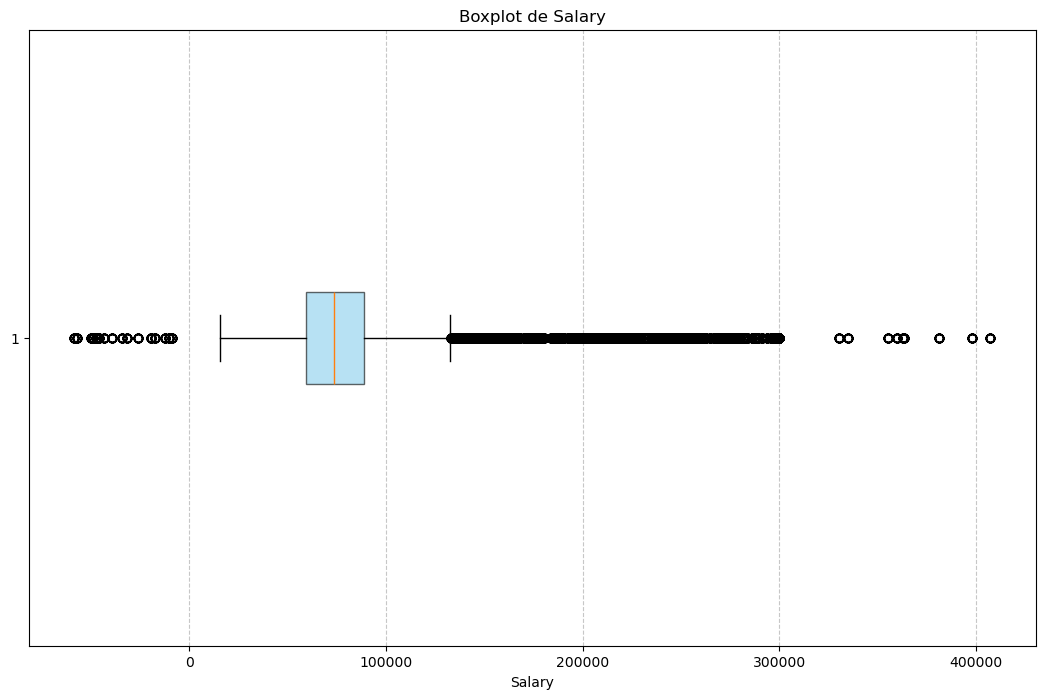

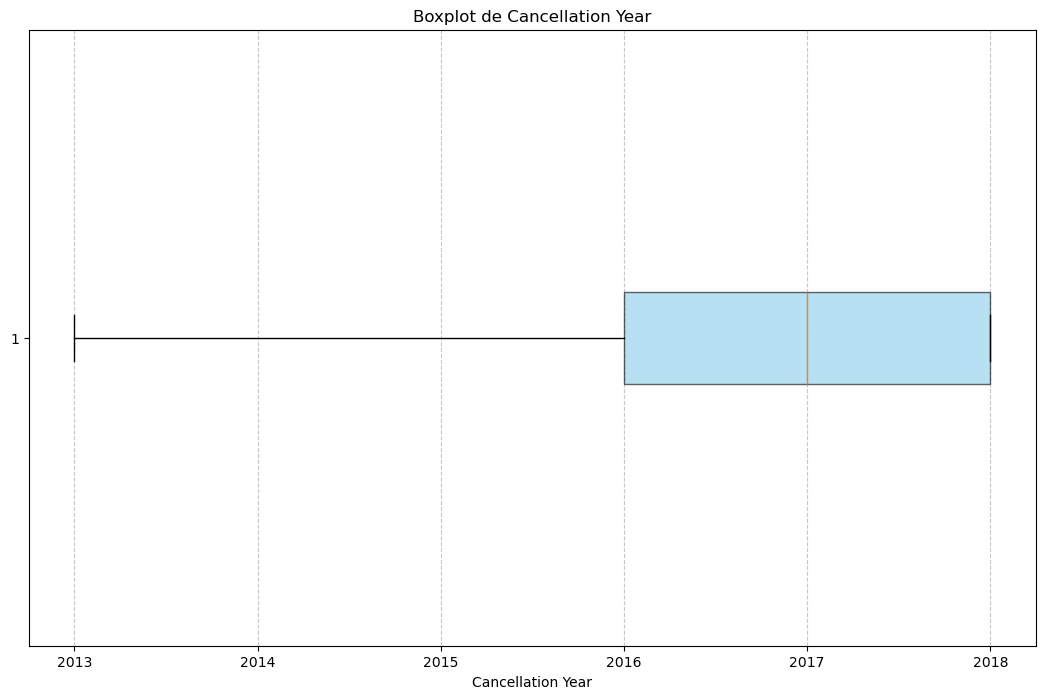

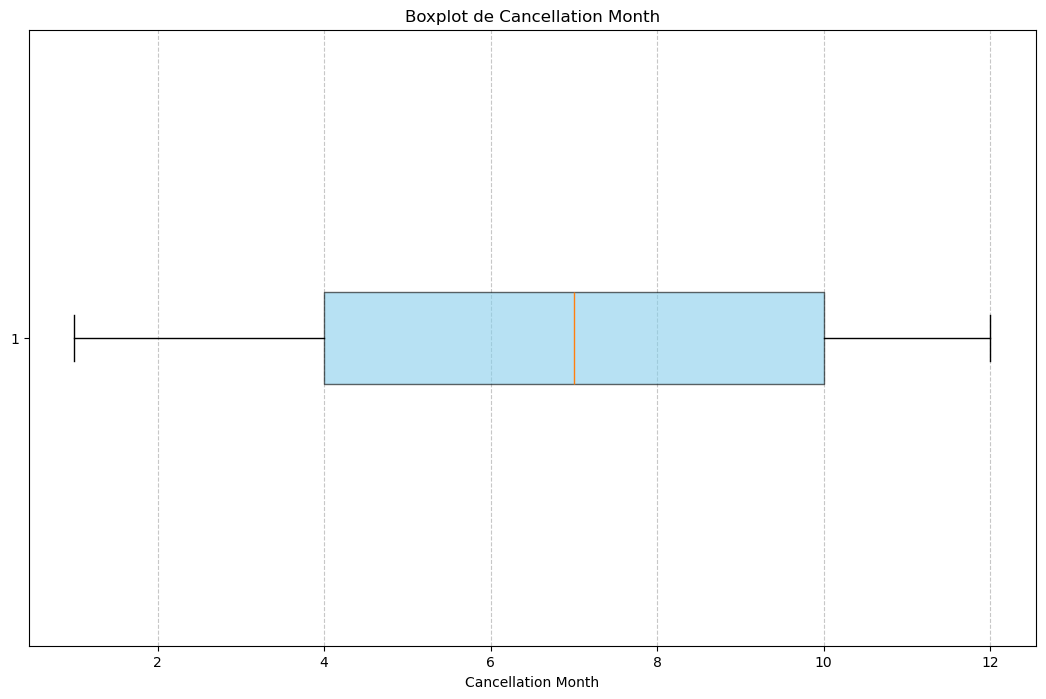

In [41]:

# Vamos a utilizar los boxplots para visualizar los valores atípicos

for col in columnas_number_con_nulos:
    plt.figure(figsize=(13, 8))
    plt.boxplot(df_merge[col].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue", alpha=0.6))
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.7)  # Agregamos cuadrícula en el eje X
    plt.show()

# Hemos investigado como usar el bucle del histograma para adaptarlo a un boxplot.

### CONCLUSIONES E INSIGHTS


    # En el boxplot del salario podemos ver la gran dispersión de valores que hay ya que hay muchos valores atípicos, y el rango de valores medio es muy breve. 
    # Por lo tanto estos valores afectarán a la media, siendo más apropiado fijarse en la mediana.
    # Aunque esta sesgada a la izquierda, sugiriendo que los salarios son más bajos que los de una distribución normal, hay muchos más valores atípicos en el rango de salarios altos


    # En el boxplot de cancellation year podemos ver que no hay valores atípicos pero vemos una progresión ascendente en los últimos años.
    # Esto sugiere que la empresa debe tomar medidas de fidelización de los clientes para no seguir perdiéndolos, y medidas de captación de clientes para recuperar a los que ha perdido.


    # En el boxplot de cancellation month podemos ver que no hay valores atípicos, y la distribución es más uniforme. 

### 4. LIMPIEZA DE DATOS

In [42]:
# En primer lugar vamos a homogeneizar las columnas de los dataframes.

# En este caso, en cuanto a las columnas, no hay nombres repetidos, ni tampoco es necesario borrar ninguna, por lo que nos centraremos en limpiar comas, puntos y mayúsculas.

In [43]:
# Vamos a eliminar los espacios en blanco delanteros y traseros:

df_merge.columns = df_merge.columns.str.strip() 

# Vamos a eliminar los espacios internos:

df_merge.columns = df_merge.columns.str.replace(" ", "_")  


# Vamos a eliminar los caracteres especiales

import re
df_merge.columns = [re.sub(r'\W+', '_', col) for col in df_merge.columns]



In [44]:
# Vamos a eliminar las comas:

for col in df_merge.columns:
    # Comprobamos si es tipo texto
    if df_merge[col].dtype == "object":
        # Eliminamos las comas
        df_merge[col] = df_merge[col].str.replace(",", "", regex=True)

In [45]:
# GESTIÓN DE DUPLICADOS

In [46]:
# En primer lugar vamos a visualizar los duplicados:

df_merge.duplicated().sum()



1864

In [47]:
# Ahora vamos a borrarlos:

df_noduplicates = df_merge.drop_duplicates()


In [48]:
# NUEVO DF SIN DUPLICADOS:

df_noduplicates

# Sobre este df haremos la gestión de nulos

,Loyalty_Number,Year,Month,Flights_Booked,Flights_with_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed,Country,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,CLV,Enrollment_Type,Enrollment_Year,Enrollment_Month,Cancellation_Year,Cancellation_Month
0,100018,2017,1,3,0,3,1521.0,152,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320.0,132,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110.0,311,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924.0,92,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0.0,0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,999986,2018,7,15,0,15,1995.0,199,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
405620,999986,2018,9,0,0,0,0.0,0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
405621,999986,2018,10,6,0,6,708.0,70,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
405622,999986,2018,11,11,4,15,2040.0,204,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN


In [49]:
# GESTIÓN DE LOS VALORES NULOS

In [50]:

df_nulos = df_noduplicates.isnull().sum().sort_values(ascending=False)

print (df_nulos)

# Las columnas salary, cancellation year y cancellation month contienen nulos.

Cancellation_Month             354110
Cancellation_Year              354110
Salary                         102260
Postal_Code                         0
Enrollment_Month                    0
Enrollment_Year                     0
Enrollment_Type                     0
CLV                                 0
Loyalty_Card                        0
Marital_Status                      0
Education                           0
Gender                              0
Loyalty_Number                      0
Year                                0
Province                            0
Country                             0
Dollar_Cost_Points_Redeemed         0
Points_Redeemed                     0
Points_Accumulated                  0
Distance                            0
Total_Flights                       0
Flights_with_Companions             0
Flights_Booked                      0
Month                               0
City                                0
dtype: int64


In [51]:
# Vamos a visualizarlo en porcentajes para tener una visión más clara del umbral de nulos y tomar las siguientes decisiones para su gestión.

df_nulos_porcentaje = df_noduplicates.isnull().sum() / df_merge.shape[0] * 100
df_nulos_porcentaje.sort_values(ascending=False)

# Como vemos tanto las columnas salary, cancellation year y cancellation month tienen un porcentaje de nulos superior al 15%


Cancellation_Month             87.300061
Cancellation_Year              87.300061
Salary                         25.210540
Postal_Code                     0.000000
Enrollment_Month                0.000000
Enrollment_Year                 0.000000
Enrollment_Type                 0.000000
CLV                             0.000000
Loyalty_Card                    0.000000
Marital_Status                  0.000000
Education                       0.000000
Gender                          0.000000
Loyalty_Number                  0.000000
Year                            0.000000
Province                        0.000000
Country                         0.000000
Dollar_Cost_Points_Redeemed     0.000000
Points_Redeemed                 0.000000
Points_Accumulated              0.000000
Distance                        0.000000
Total_Flights                   0.000000
Flights_with_Companions         0.000000
Flights_Booked                  0.000000
Month                           0.000000
City            

In [52]:
# Ahora vamos a volver a consultar las columnas para ver como han quedado.

df_noduplicates.columns

Index(['Loyalty_Number', 'Year', 'Month', 'Flights_Booked',
       'Flights_with_Companions', 'Total_Flights', 'Distance',
       'Points_Accumulated', 'Points_Redeemed', 'Dollar_Cost_Points_Redeemed',
       'Country', 'Province', 'City', 'Postal_Code', 'Gender', 'Education',
       'Salary', 'Marital_Status', 'Loyalty_Card', 'CLV', 'Enrollment_Type',
       'Enrollment_Year', 'Enrollment_Month', 'Cancellation_Year',
       'Cancellation_Month'],
      dtype='object')

In [53]:
# Ahora vamos a delimitar el tipo de nulos que son y la manera de gestionarlos.

columnas_nulas = ['Salary', 'Cancellation_Year', 'Cancellation_Month']

# Ahora vamos a iterar en cada columna para ver el tipo de datos:

for i in columnas_nulas:

    print(f'La columna "{i}" es de tipo: {df_noduplicates.dtypes[i]}')
    print(f'Su porcentaje de nulos es {df_nulos_porcentaje[i]}')
    print('--------------------------------------------------------')



# En este caso vemos que son de tipo numérico, y en todos los casos superan el umbral del 15% por ciento por lo que consideramos que es un alto porcentaje de nulos. 
# Para poder tratarlos tenemos que recurrir a técnicas más avanzadas.

# En el caso de las columnas de cancellation year y cancellation month tienen un 87% de nulos. De ahí se puede intuir que los nulos son clientes que siguen activos.
# Por ello, aunque sean de tipo numérico, la mejor manera de gestionarlos es crear una nueva categoría, qur llamaremos 'Customer'.
# De esa manera, eliminaremos los nulos de forma que no influyan en los cálculos estadísticos.

# En el caso de la columna salary, al ser una columna numérica y con un porcentaje alto de nulos, la mejor manera de gestionar los nulos es mediante técnicas avanzadas.
# En este caso concreto, utilizaremos KNNImputer ya que existen otras columnas con datos que estan estrechamente relacionados con el salario, como puedne ser el estado marital o el nivel educativo.



La columna "Salary" es de tipo: float64
Su porcentaje de nulos es 25.210539810267633
--------------------------------------------------------
La columna "Cancellation_Year" es de tipo: float64
Su porcentaje de nulos es 87.30006114036645
--------------------------------------------------------
La columna "Cancellation_Month" es de tipo: float64
Su porcentaje de nulos es 87.30006114036645
--------------------------------------------------------


In [54]:
# Vamos a mostrar todos los detalles de cada columna:

for col in columnas_nulas:
    print(f'La columna "{col}" es de tipo: {df_merge.dtypes[col]}')
    print(f'Su porcentaje de nulos es {df_nulos_porcentaje [col]}')
    print(f'Su distribución por categorías, incluyendo nulos, es:')
    display(df_merge[col].value_counts(dropna=False, normalize=True) * 100)
    print('--------------------------------------------------------')



La columna "Salary" es de tipo: float64
Su porcentaje de nulos es 25.210539810267633
Su distribución por categorías, incluyendo nulos, es:


Salary
 NaN         25.312112
 101933.0     0.136087
 62283.0      0.082835
 51573.0      0.082835
 61809.0      0.082835
               ...    
-31911.0      0.005917
 64630.0      0.005917
 77950.0      0.005917
 85525.0      0.005917
 46594.0      0.005917
Name: proportion, Length: 5891, dtype: float64

--------------------------------------------------------
La columna "Cancellation_Year" es de tipo: float64
Su porcentaje de nulos es 87.30006114036645
Su distribución por categorías, incluyendo nulos, es:


Cancellation_Year
NaN       87.657535
2018.0     3.857760
2017.0     3.005739
2016.0     2.532395
2015.0     1.597539
2014.0     1.088693
2013.0     0.260340
Name: proportion, dtype: float64

--------------------------------------------------------
La columna "Cancellation_Month" es de tipo: float64
Su porcentaje de nulos es 87.30006114036645
Su distribución por categorías, incluyendo nulos, es:


Cancellation_Month
NaN     87.657535
11.0     1.272114
8.0      1.260280
12.0     1.260280
7.0      1.124194
10.0     1.076859
9.0      1.041358
6.0      0.982190
1.0      0.923022
3.0      0.887521
5.0      0.881605
2.0      0.822437
4.0      0.810603
Name: proportion, dtype: float64

--------------------------------------------------------


In [55]:
# Vamos a gestionar los nulos de las columnas 'Cancellation_Year' y 'Cancellation_Month'

df_noduplicates.loc[:, ['Cancellation_Year', 'Cancellation_Month']] = df_noduplicates[['Cancellation_Year', 'Cancellation_Month']].fillna('Customer')


# Usamos el loc[] para asegurarnos que el dataframe se modifica correctamente.


# Tiene un porcentaje de nulos muy alto, y no podemos sustituir los nulos por un valor absurdo porque interferiría en el cálculo estadístico, por tanto creamos una nueva categoría que sería 'Customer'.


In [ ]:
# Vamos a gestionar los nulos de la columna 'Salary'

# Para ello vamos a usar una técnica avanzada ya que el porcentaje de nulos supera el 15%.

# Vamos a usar KNNImputer, ya que en este caso hay otras columnas que están muy relacionadas con el salario, como son el estado marital o el nivel educativo.

# Creamos una copia de seguridad de nuestro dataframe:

df_copia = df_noduplicates.copy()

# Detallamos los parámetros de KNNImputer:

imp_knn = KNNImputer(n_neighbors=10)
imp_knn_d = imp_knn.fit_transform(df_noduplicates[['Salary']])
df_noduplicates.loc[:, 'Salary'] = imp_knn_d  
df_noduplicates['Salary'].describe().T.reset_index().round()



In [ ]:
# Vamos a comprobar que no queda ningún nulo:


In [ ]:
df_noduplicates['Salary'].isnull().sum()


0

In [ ]:
df_noduplicates['Cancellation_Year'].isnull().sum()


0

In [ ]:
df_noduplicates['Cancellation_Month'].isnull().sum()

0

In [ ]:
# Por último vamos a guardar un CSV con un dataframe nuevo sin los valores nulos que es el que usaremos en la visualización:

df_noduplicates.to_csv('df_nonull.csv', index=False)



### VISUALIZACIÓN DE DATOS

In [ ]:
# Vamos a dar respuesta a las preguntas que se nos plantean.


In [ ]:
# 1. CÓMO SE DISTRIBUYE LA CANTIDAD DE VUELOS RESERVADOS POR MES DURANTE EL AÑO?

In [ ]:
# Vamos a leer el dataframe:

df_nonull = pd.read_csv('df_nonull.csv')


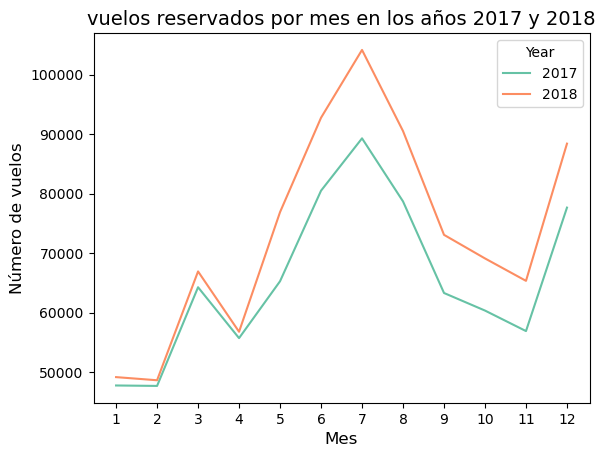

In [ ]:
# Vamos a usar una gráfica de lineas para ver ambas variables y la relación que tienen.

df_monthyear = df_nonull.groupby(["Year","Month"])["Flights_Booked"].sum().reset_index()


# La versión de python nos aconseja incluir el hue para que no de errores en el futuro

sns.lineplot(x="Month", 
            y="Flights_Booked", 
            hue="Year", 
            data=df_monthyear,
            palette = 'Set2')

# Personalización del gráfico
plt.title("vuelos reservados por mes en los años 2017 y 2018", fontsize=14)
plt.xticks(ticks=range(1, 13))
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Número de vuelos", fontsize=12);



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

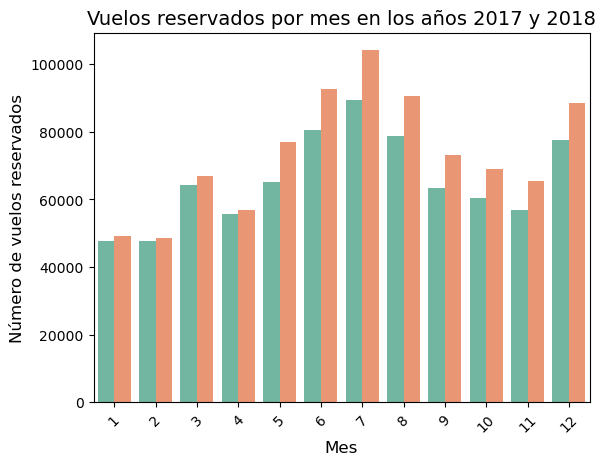

In [ ]:
# Utilizaremos también un gráfico de barras para visualizarlo mejor


# Python nos aconseja incluir legend y hue para evitar futuros errores

sns.barplot(x="Month", 
            y="Flights_Booked",
            hue="Year",
            legend = False,
            data=df_monthyear, 
            palette='Set2')

plt.title("Vuelos reservados por mes en los años 2017 y 2018", fontsize=14)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Número de vuelos reservados", fontsize=12)
plt.xticks(rotation=45)


### CONCLUSIONES E INSIGHTS

    # A partir de estos gráficos podemos deducir las siguientes conclusiones:

        # Como vemos, hay una tendencia muy similar en ambos años, teniendo los mismos picos en los mismos meses, superando el año 2018 al 2017 en todos ellos.
        # Los meses de mayor número de reservas coinciden con aquellos de temporada alta, tales como los meses de verano Junio, Julio y Agosto y otro repunte en Navidad en Diciembre.
        # Estos picos se deben tanto a los periodos vacacionales como a posibles promociones o políticas de empresa.
        # Se puede ver que entre los meses de Enero y Abril se producen menos reservas que en el resto del año, y en esos meses la diferencia enytre 2017 y 2018 es muy leve.
        # Sin embargo esa diferencia es mucho mas pronunciada de Junio hacia Diciembre incluido.

    # Algunas medidas que se podrían implementar para aumentar el número de vuelos en los meses de temporada baja serían:

        # Descuentos exclusivos para quienes viajen en meses de baja demanda.
        # Promociones flash por tiempo limitado para generar urgencia.
        # Ajuste de tarifas para incentivar reservas en fechas menos populares.
        # Duplicar la acumulación de puntos en temporada baja.
      

In [ ]:
# 2. ¿EXISTE UNA RELACIÓN ENTRE LA DISTANCIA DE LOS VUELOS Y LOS PUNTOS ACUMULADOS POR LOS CLIENTES?

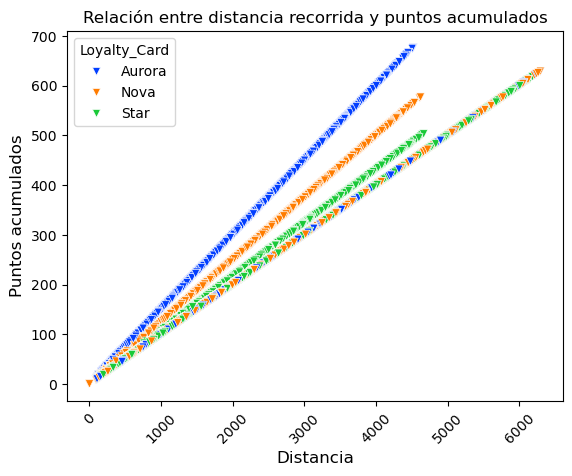

In [ ]:
# En este caso nos preguntan si hay correlación entre ambas variables por lo que un scatterplot puede ser muy ilustrativo.


sns.scatterplot(x="Distance", 
                y="Points_Accumulated", 
                hue= "Loyalty_Card", 
                data=df_nonull,  
                marker= "v", 
                palette="bright")

# Personalización del gráfico
plt.title("Relación entre distancia recorrida y puntos acumulados", fontsize=12)
plt.xlabel('Distancia', fontsize=12)
plt.ylabel('Puntos acumulados', fontsize=12)
plt.xticks(rotation=45);


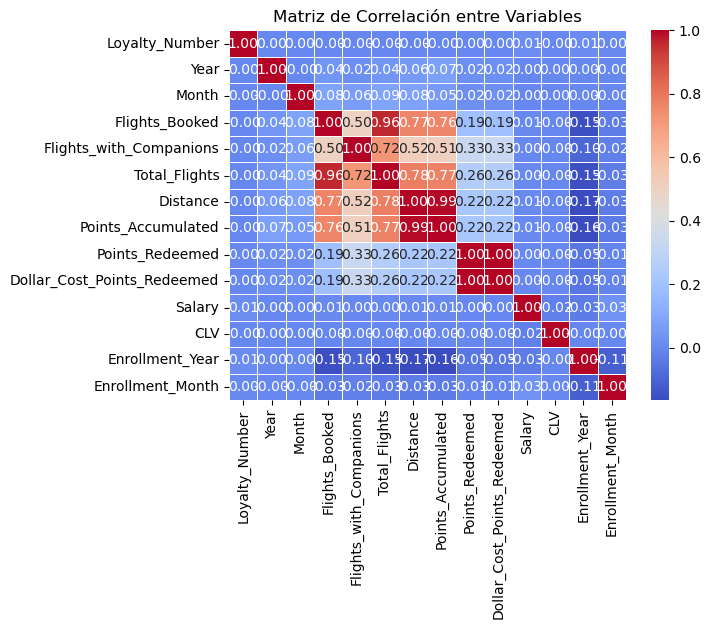

In [ ]:
# Vamos a utilizar un heatmap para ver la correlación de todas las variables y asi fijarnos en la que nos ocupa, puntos acumulados y distancia.


# Matriz de correlación
variables_numericas = df_nonull.select_dtypes(include="number").columns

# definimos la correlación
correlation_matrix = df_nonull[variables_numericas].corr()


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Añade título
plt.title('Matriz de Correlación entre Variables')

# Muestra el gráfico

plt.show()



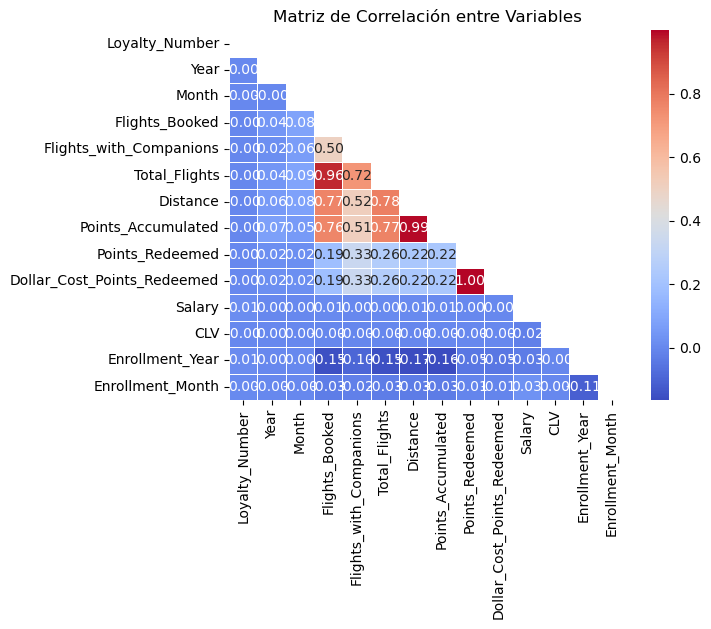

In [ ]:
# Sólo queremos mostrar la mitad inferior para un análisis más claro

# Creamos una máscara para mostrar sólo la parte inferior de la matriz
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))


sns.heatmap(correlation_matrix, annot=True, mask = mask, cmap='coolwarm', fmt='.2f', linewidths=.5)

plt.title('Matriz de Correlación entre Variables')


plt.show()


### CONCLUSIONES E INSIGHTS

    # En el scatterplot podemos ver una distribución asecendente clara, por lo que la relación entre distancia y puntos acumulados es totalmente directa.
    # Observamos que no hay dispersión en la tendencia, es muy nítida, por lo que a mayor distancia recorrida, más puntos acumulados.
    # También podemos añadir que las diferencias entre las tarjetas de lealtad son claras, por lo que el sistema de fidelidad es efectivo.
    # Se pueden distinguir perfectamente las tres categorías de puntos, de menor a mayor, y, a mayor categoría, mayor acumulación de puntos por la misma distancia.
    # Se puede observar un patrón inesperado en el que se mezclan clientes de diferentes categorías, para las mismas distancias, esto puede deberse a factores adicionales como:
        # Clase de vuelo
        # Promociones
        # Compras adicionales...etc


    # En el heatmap confirmamos estas conclusiones observando el grado de correlación entre la distancia y los puntos acumulados, que guardan una relacion del 0'99, siendo de las más altas.
    # Con este grado de correlación se demuestra que el programa de lealtad es eficiente y por tanto es lógico aconsejar a la empresa que lo promocione entre sus clientes.


In [ ]:
# 3. ¿ CUÁL ES LA DISTRIBUCIÓN DE LOS CLIENTES POR PROVINCIA O ESTADO?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Ontario'),
  Text(1, 0, 'British Columbia'),
  Text(2, 0, 'Quebec'),
  Text(3, 0, 'Alberta'),
  Text(4, 0, 'Manitoba'),
  Text(5, 0, 'New Brunswick'),
  Text(6, 0, 'Nova Scotia'),
  Text(7, 0, 'Saskatchewan'),
  Text(8, 0, 'Newfoundland'),
  Text(9, 0, 'Yukon'),
  Text(10, 0, 'Prince Edward Island')])

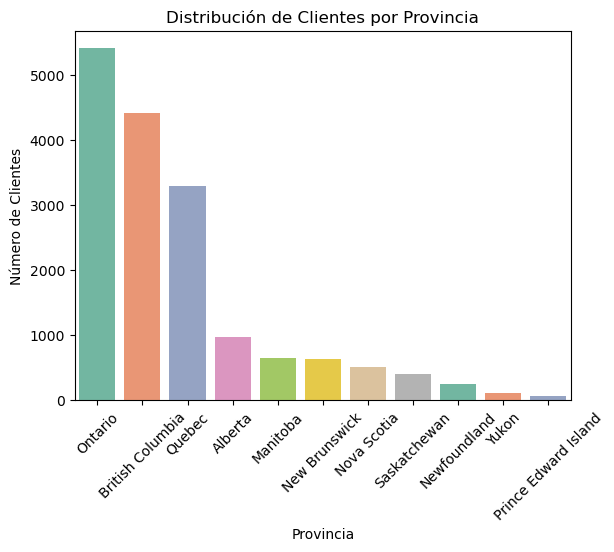

In [ ]:
# Vamos a usar un gráfico de barras para ver la distribución de ambas variables.

# Como en la coumna que usamos para identificar a cada cliente es la de Loyalty Number y en ella aparece varias veces cada cliente, utilizaremos .nunique() para contar los valores únicos de esa columna.

df_provinces = df_nonull.groupby("Province")["Loyalty_Number"].nunique().reset_index().sort_values("Loyalty_Number", ascending=False).reset_index(drop=True)

df_provinces


# La versión de python nos aconseja incluir el hue y el legend para evitar errores en el futuro

sns.barplot(x="Province", 
            y= "Loyalty_Number", 
            data=df_provinces, 
            hue= "Province",
            legend=False,
            palette='Set2')

plt.title('Distribución de Clientes por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)



### CONCLUSIONES E INSIGHTS

    # Con el gráfico de barras podemos ver la distribución de clientes por provincias.
    # Se aprecia una relación directa entre las provincias más pobladas y ricas, y las que tienen más clientes, siendo las más destacadas, Ontario, Quebec y la Columbia Británica.
    # Hay un claro decrecimiento de clientes despues del top 3. Esto de debe a que Ontario, Quebec y la Columbia Británica concentran casi el 75% de la población canadiense. 
    # Por este motivo el descenso de clientes para el resto de provincias es tan abrupto, ya que sólo ostentan el 25% de la población restante.

    # Para incentivar a los clientes de las provincias menos pobladas a viajar más, se podrían tomar varias medidas:
            # Tarifas especiales para residentes
            # Mas rutas directa o vuelos estacionales
            # Paquetes turísticos
            # Mejora de la experiencia en aeropuertos pequeños
       


In [ ]:
# 4. ¿ CÓMO SE COMPARA EL SALARIO PROMEDIO ENTRE LOS DIFERENTES NIVELES EDUCATIVOS DE LOS CLIENTES?

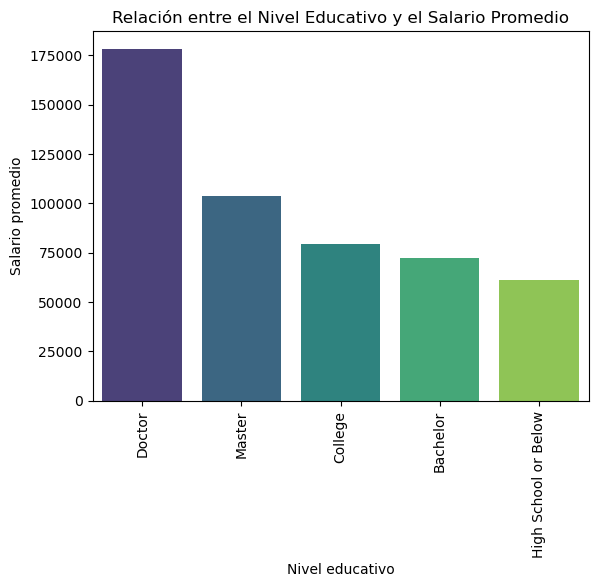

In [ ]:
# En primer lugar vamos a realizar la agrupación que nos permitirá dar respuesta a esta pregunta.

average_salary = df_nonull.groupby("Education")["Salary"].mean().reset_index().sort_values("Salary", ascending=False).reset_index(drop=True)
average_salary

# La versión de python nos aconseja incluir el hue y el legend para evitar errores en el futuro

sns.barplot(x="Education", 
            y= "Salary", 
            hue="Education",
            legend=False,
            data= average_salary, 
            palette="viridis")

plt.title("Relación entre el Nivel Educativo y el Salario Promedio")
plt.xlabel("Nivel educativo")
plt.ylabel("Salario promedio")
plt.xticks(rotation=90);



### CONCLUSIONES E INSIGHTS

    # Podemos observar una clara relación entre el nivel educativo y el salario promedio.
    # Si nos fijamos en los segmentos de 'Doctor' y 'Master', es destacable el hecho de que a mayor especialziación, el aumento de salario es más significativo.
    # Esto indica que la inversión en educación y la especialización son clave para acceder a mejores posiciones laborales y a salarios más altos.
    # Sería interesante analizar el impacto de otras variables que también influyen en el salario, como por ejemplo la situación geográfica, la industria o la experiencia laboral.

    # Promover políticas que fomenten la educación superior y la formación continua es una vía efectiva para mejorar las condiciones laborales y fomentar el desarrollo económico.
    # Para ello se pueden tomar las siguientes medidas:
            # Promover la educación a distancia, ya que es una opción viable para aquellos a los que les sea más dificil acceder a la educación.
            # Programas de formación continua alineados con las demandas del mercado laboral y sectores en crecimiento.
            # Alianzas con empresas facilitar la inserción en el mercado laboral
            # Políticas de apoyo a la investigación y la innovación


In [ ]:
# 5. ¿ CUÁL ES LA PROPORCIÓN DE CLIENTES CON DIFERENTES TIPOS DE TARJETAS DE FIDELIDAD?

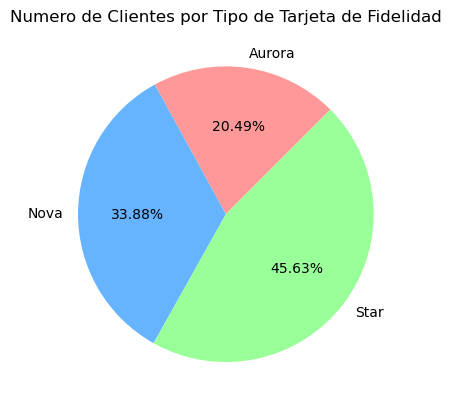

In [ ]:
# Para responder a esta pregunta vamos a utilizar un piechart que nos permitirá observar con más claridad las diferencias entre las tarjetas de fidelidad

fidelity = df_nonull.groupby('Loyalty_Card')['Loyalty_Number'].nunique()
fidelity


plt.pie(fidelity.values, 
        labels= fidelity.index, 
        autopct=  '%1.2f%%', 
        startangle=45, 
        colors=['#ff9999','#66b3ff','#99ff99'])

# Personalización del gráfico
plt.title("Numero de Clientes por Tipo de Tarjeta de Fidelidad", fontsize=12);



### CONCLUSIONES E INSIGHTS

    # Mediante este gráfico se puede apreciar claramente el grado de popularidad de las tarjetas de fidelización.
    # Tarjeta 'Star':
            # Es la más común con casi un 46% de clientes. 
            # Esto se debe a que es la más accesible económicamente, la que menos requisitos de fidelidad requiere o la más fácil de conseguir debido a la menor distancia recorrida.
    # Tarjeta 'Nova':
            # Conforma la siguiente categoría con casi un 34% de clientes. 
            # Se podría decir que es la catergoría intermedia.
    # Tarjeta 'Aurora':
            # Constituye la de mayor categoría, con casi un 21% de clientes.
            # Sólo los clientes con un mayor poder adquisitivo, un mayor grado de fidelidad o una mayor cantidad de distancia recorrida pueden acceder a ella.

    # Podemos ver que hay una relación proporcionalmente inversa entre el número de clientes y la exclusividad de la tarjeta de fidelidad.
    # Es decir, a mayor exclusividad, menor numero de clientes cumplen los requisitos de fidelidad requeridos o pueden permitírsela.

    # Las categorías de tarjetas son una forma de segmentar y personalizar la experiencia del cliente según varios criterios como:
            # La lealtad 
            # La frecuencia de uso 
            # Las necesidades específicas de cada cliente. 

    # Este enfoque ayuda a las empresas a maximizar la satisfacción y adaptarse a las diferentes necesidades y posibilidades económicas de sus clientes.

    # Es importante incentivar que los clientes aumenten su grado de compromiso con la aerolínea y suban de categoría, SIN primar la captación por encima de la fidelización.
    # Para ello, es importante un equilibrio entre reconocer y recompensar a los clientes de alto nivel y motivar a los clientes de niveles inferiores a ascender.
    # Algunas medidas que se pueden tomar son:
            # Recompensas diferenciadas para quienes suben de categoría, pero sin hacer que los beneficios de los clientes de mayor categoría se vean inalcanzables. 
            # Pequeños detalles a los clientes que suben de nivel, mientras que los beneficios de los clientes de mayor categoría se mantienen exclusivos y deseables.
            # Ofertas de tiempo limitado donde los clientes puedan experimentar beneficios exclusivos temporalmente por lo que los clientes premium no sientan que sus beneficios se 'regalan'.


In [ ]:
# 6. ¿CÓMO SE DISTRIBUYEN LOS CLIENTES SEGÚN SU ESTADO CIVIL Y GÉNERO?

Text(0.5, 0, 'Estado Civil')

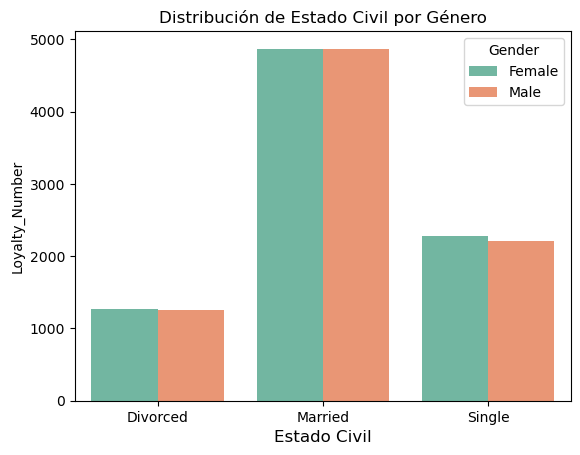

In [ ]:

# Comenzaremos con la agrupación según el género y el estado marital para dar respuesta a esta pregunta.

df_marital = df_nonull.groupby(["Marital_Status", "Gender"])["Loyalty_Number"].nunique().reset_index()
df_marital

# Creamos el gráfico

sns.barplot(x='Marital_Status', 
            y="Loyalty_Number", 
            hue='Gender', 
            data=df_marital, 
            palette="Set2")

# Personalización del gráfico

plt.title('Distribución de Estado Civil por Género', fontsize=12)
plt.xlabel('Estado Civil', fontsize=12)

### CONCLUSIONES E INSIGHTS

    # Ambos géneros estan equitativamente representados.
    # Si nos fijamos en el género se puede observar que apenas hay diferencias en el comportamiento entre hombres y mujeres.
        # Tanto en hombres y mujeres, solteros, casados o divorciados tienen hábitos de compra similares.
    # Sin embargo, SÍ podemos observar notables diferencias en sus hábitos de consumo basándonos en su estado civil:
        # Casados:
            # Los casados son clientes mucho más fieles que los solteros o divorciados.
            # Esto puede deberse a motivos económicos ya que en la mayoría de hogares cuentan con dos ingresos.
            # También es posible que la aerolínea cuente con más promociones para familias o parejas que para personas solas.
        # Solteros:
            # Los solteros serían el segundo grupo más comprometido.
            # Aunque cuentan con un solo ingreso, no suelen tener cargas familiares por lo que pueden destinar más recursos al ocio.
        # Divorciados:
            # Los divorciados serían el grupo menos comprometido.
            # Es posible que se deba a que cuentan con un solo ingreso.
            # A diferencia de los solteros, sí suelen tener cargas familiares, por lo que son los que menos recursos pueden destinar al ocio.

    # Para incentivar a los solteros y divorciados a mejorar su fidelidad, podemos tomar las siguientes medidas:
            # Descuentos especiales o promociones para solteros/divorciados
            # Ofertas de última hora ya que los solteros y divorciados pueden estar más abiertos a tomar decisiones con poca antelación.
            # Retiros de bienestar: son una experiencia más orientada a viajar solo.
            # Eventos de networking o encuentros para solteros dentro de los vuelos o en destinos específicos.

### BONUS 

In [ ]:
# FASE 1: PREPARACIÓN DE DATOS

# Filtrar el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

In [ ]:
df_filtered = df_nonull[["Education", "Flights_Booked"]]


df_filtered.head()



,Education,Flights_Booked
0,Bachelor,3
1,Bachelor,2
2,Bachelor,6
3,Bachelor,4
4,Bachelor,0


In [ ]:
# Para ver los datos con más detalle vamos a usar .describe()

df_filtered.groupby ('Education')['Flights_Booked'].describe().T 



Education,Bachelor,College,Doctor,High School or Below,Master
count,252567.000000,102260.000000,17731.000000,18915.000000,12287.000000
mean,4.110288,4.169744,4.175512,4.176209,4.200700
std,5.221671,5.246040,5.256971,5.239267,5.213956
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000
max,21.000000,21.000000,21.000000,21.000000,21.000000


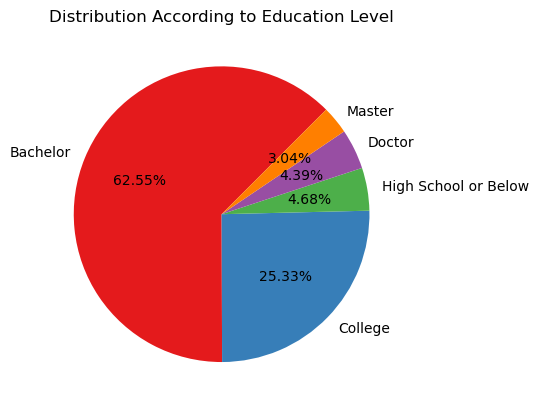

In [ ]:
# Vamos a usar un piechart para ver la distribución con mayor claridad.

# Para ello vamos primero a crear una variable nueva donde aparezca un conteo de cada nivel educativo

education_counts = df_filtered['Education'].value_counts()


# Creamos el gráfico

plt.pie(education_counts,
        labels=education_counts.index,
        autopct='%1.2f%%', 
        startangle=45, 
        colors=plt.cm.Set1.colors)  


plt.title("Distribution According to Education Level", fontsize=12)


plt.show()

### CONCLUSIONES E INSIGHTS

    # Mediante este gráfico podemos destacar las siguientes conclusiones:
            # El grado universitario tiene prevalencia sobre los demás niveles educativos, constituyendo casi un 63% de los clientes.
            # El segundo nivel educativo predominante sería el bachillerato, que agrupa a casi un 26% de los clientes.              
            # Los demás niveles agrupan al 11% restante.
    # Se puede observar que tanto los niveles inferiores (instituto) como los niveles superiores (master y doctorado) son los más escasos.
    # Es lógico que haya un porcentaje pequeño de educación básica en un país desarrollado como Canadá.
    # Es lógico que haya un porcentaje pequeño de masters y doctorados puesto que requieren una gran inversión económica y de tiempo que pocos pueden permitirse.

    # Para aprovechar esta segmentación tan clara entre niveles educativos, se pueden tomar las siguientes medidas:
            # Diseñar ofertas o beneficios dirigidos a cada nivel educativo según sus necesidades y capacidad económica.
            # Adaptar sus productos y servicios a las características y expectativas de los diferentes segmentos.
            # Para los niveles educativos menos prevalentes, la aerolínea podría crear campañas para atraer a esos segmentos menos representados.

In [ ]:
# FASE 2: ANÁLISIS DESCRIPTIVO

#  Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estándar) del número de vuelos reservados para cada grupo.

In [ ]:

# Podemos calcular todas las estadísticas juntas.

education_stats= df_filtered.groupby ('Education')['Flights_Booked'].agg(['mean', 'median', 'std'])
education_stats


,mean,median,std
Education,,,
Bachelor,4.110288,1.0,5.221671
College,4.169744,1.0,5.246040
Doctor,4.175512,1.0,5.256971
High School or Below,4.176209,1.0,5.239267
Master,4.200700,1.0,5.213956


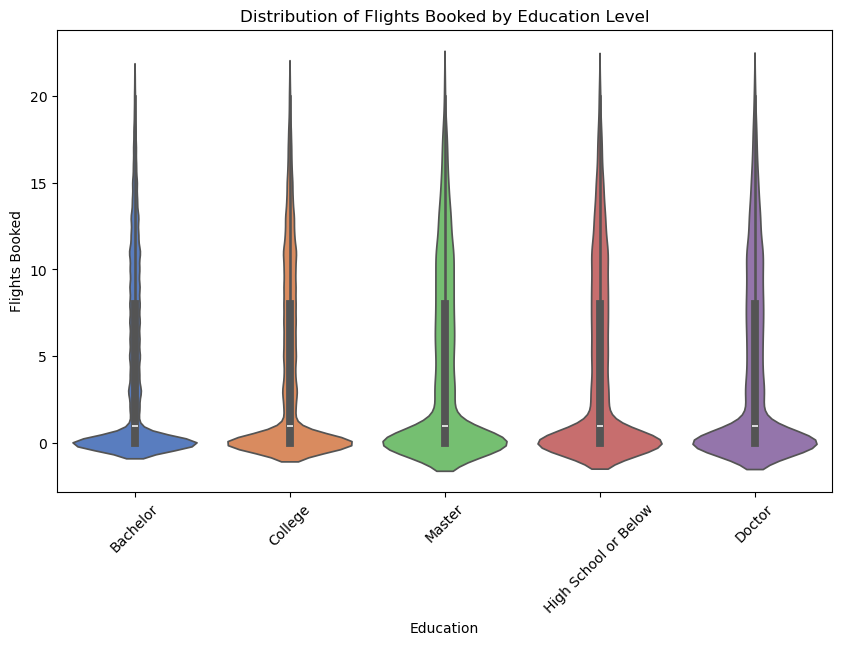

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Education", y="Flights_Booked", data=df_filtered, palette="muted")

plt.title("Distribution of Flights Booked by Education Level")
plt.ylabel("Flights Booked")
plt.xticks(rotation=45)
plt.show()


### CONCLUSIONES E INSIGHTS

    # Según la tabla y el gráfico, se pueden destacar las siguientes conclusiones:

        # La media es consistente entre los niveles educativos, por tanto la educación no es determinante en el número de vuelos reservados, siendo la media de 4 vuelos.
        # La mediana es la misma en todos los niveles, por tanto la mayoria de los clientes reservan sólo un vuelo por transacción.
        # La desviación es bastante alta en todos los niveles, lo que puede resultar contradictorio con la media, vamos a aclararlo:
                # La media de vuelos por persona es de 4 vuelos independientemente del nivel educativo.
                # La desviación muestra una gran variabilidad en el comportamiento de los clientes.
                # Por lo que aunque la media es 4, algunos clientes reservan muchos menos y otros muchos más, afectando a la media.
                # Esto concuerda con la mediana, que es de 1 vuelo por persona. 

    # Algunas sugerencias para la aerolínea serían:
        # La segmentación según la fidelidad de sus clientes. Premiando a los más comprometidos e incentivando a los menos leales.
        # Promociones para reservas múltiples: Así aumentaría la mediana, se reduciría la dispersión de los datos y disminuiría la desviación.
        # De esta manera aumnetarían las reservas por transacción acercando la mediana a la media, y la media seria realmente representativa.


In [ ]:
# FASE 3: PRUEBA ESTADÍSTICA

# Realiza una prueba de hipótesis para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos. 
# Como son varios grupos, puedes ir comparándolos de dos en dos

In [ ]:
# Vamos a usar una prueba de testeo para confirmar o desmentir las hipotesis, en este caso, comprobar si existe una relación entre el número de vuelos reservados y el nivel educativo.



# Vamos primero a calcular el numero de vuelos reservados para cada nivel educativo


bachelor = df_filtered[df_filtered['Education'] == 'Bachelor']['Flights_Booked'].to_numpy()
college = df_filtered[df_filtered['Education'] == 'College']['Flights_Booked'].to_numpy()
master = df_filtered[df_filtered['Education'] == 'Master']['Flights_Booked'].to_numpy()
high_school_or_below = df_filtered[df_filtered['Education'] == 'High School or Below']['Flights_Booked'].to_numpy()
doctor = df_filtered[df_filtered['Education'] == 'Doctor']['Flights_Booked'].to_numpy()


# Utilizamos la función de la prueba de testeo

def prueba_hipotesis(*args):
    """
    Realiza una prueba de hipótesis para comparar grupos.
    1. Primero verifica si los datos son normales usando el test de Shapiro-Wilk o Kolmogorov-Smirnov.
    2. Si los datos son normales, usa Bartlett para probar igualdad de varianzas. Si no son normales, usa Levene.
    3. Si las varianzas son iguales, usa el t-test de Student; si no, usa la versión de Welch.
    4. Si los datos no son normales, usa el test de Mann-Whitney

    Parámetros:
    *args: listas o arrays con los datos de cada grupo. Espera DOS grupos a comparar

    Retorna:
    dict con resultados del test de normalidad, varianza e hipótesis.
    """
    
    # Verificar si hay al menos dos grupos
    if len(args) < 2:
        raise ValueError("Se necesitan al menos dos conjuntos de datos para realizar la prueba.")
    
    # Comprobar normalidad en cada grupo
    normalidad = []
    for grupo in args:
        if len(grupo) > 50:
            p_valor_norm = stats.kstest(grupo, 'norm').pvalue  # Kolmogorov-Smirnov si n > 50
        else:
            p_valor_norm = stats.shapiro(grupo).pvalue  # Shapiro-Wilk si n <= 50
        normalidad.append(p_valor_norm > 0.05)

    datos_normales = all(normalidad)  # True si todos los grupos son normales

    # Prueba de igualdad de varianzas
    if datos_normales:
        p_valor_varianza = stats.bartlett(*args).pvalue  # Test de Bartlett si los datos son normales
    else:
        p_valor_varianza = stats.levene(*args, center="median").pvalue  # Test de Levene si no son normales

    varianzas_iguales = p_valor_varianza > 0.05

    # Aplicar el test adecuado
    if datos_normales:
        if varianzas_iguales:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
            test_usado = "t-test de Student (varianzas iguales)"
        else:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
            test_usado = "t-test de Welch (varianzas desiguales)"
    else:
        t_stat, p_valor = stats.mannwhitneyu(*args)
        test_usado = "Mann-Whitney U"

    # Nivel de significancia
    alfa = 0.05

    # Resultados
    resultado = {
        "Test de Normalidad": normalidad,
        "Datos Normales": datos_normales,
        "p-valor Varianza": p_valor_varianza,
        "Varianzas Iguales": varianzas_iguales,
        "Test Usado": test_usado,
        "Estadístico": t_stat,
        "p-valor": p_valor,
        "Conclusión": "Rechazamos H0. Es decir, sí hay diferencias significativas)" if p_valor < alfa else "No se rechaza H0. Es decir, no hay diferencias significativas)"
    }

    # Imprimir resultados de manera más clara
    print("\n📊 **Resultados de la Prueba de Hipótesis** 📊")
    print(f"✅ Test de Normalidad: {'Sí' if datos_normales else 'No'}")
    print(f"   - Normalidad por grupo: {normalidad}")
    print(f"✅ Test de Varianza: {'Iguales' if varianzas_iguales else 'Desiguales'} (p = {p_valor_varianza:.4f})")
    print(f"✅ Test aplicado: {test_usado}")
    print(f"📉 Estadístico: {t_stat:.4f}, p-valor: {p_valor:.4f}")
    print(f"🔍 Conclusión: {resultado['Conclusión']}\n")

# Listado de grupos
grupos = [high_school_or_below, college, master, bachelor, doctor]
n_grupos = len(grupos)

# Con este bucle comparamos todos los grupos por parejas, sin repetirlos.

for i in range(n_grupos):
    for j in range(i + 1, n_grupos):  # Forzamos para que se cruzen los 5 grupos entre ellos por pares
        print(f"Comparando Grupo {i+1} y Grupo {j+1}")
        resultado = prueba_hipotesis(grupos[i], grupos[j])






Comparando Grupo 1 y Grupo 2

📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Iguales (p = 0.9502)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 969453228.5000, p-valor: 0.5757
🔍 Conclusión: No se rechaza H0. Es decir, no hay diferencias significativas)

Comparando Grupo 1 y Grupo 3

📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Iguales (p = 0.7433)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 115772018.5000, p-valor: 0.5557
🔍 Conclusión: No se rechaza H0. Es decir, no hay diferencias significativas)

Comparando Grupo 1 y Grupo 4

📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Iguales (p = 0.1589)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 2409144796.0000, p-valor: 0.0360
🔍 Conclusión: Rechazamos H0. Es decir, sí hay diferencias

### CONCLUSIONES E INSIGHTS

    # Podemos ver que no hay diferencias significativas en la mayoría de las comparaciones.
    # Sin embargo SÍ se observaron diferencias entre los grupos 1,2,3 y el grupo 4.   
    # Esto quiere decir que el grupo 4 (Bachelor) tiene comportamientos significativamente diferentes con respecto a los demás grupos. 
    # Podemos decir que el nivel educativo no es un predictor por sí mismo de los hábitos de consumo de los clientes, exceptuando al grupo 4.
    # Sabiendo que el grupo de 'Bachelor' destaca en sus hábitos de consumo, podemos idear estrategias de marketing que se ajusten a las necesidades de este segmento.
    # Estos resultados sugieren que otros factores como el salario o el estado marital tienen más influencia que el nivel educativo en cuanto al número de reservas.